# Oblig 3, IN4070, 2024
#### SAT solver (non-naïve)
#### Bendik Østrem Svalastog

In [8]:
print("Hello, Martin Giese and Maham Iftikhar!")

Hello, Martin Giese and Maham Iftikhar!


I want to solve a bunch of SAT problems, like:

```python
{{p, q, r},
{-p, q, r},
{p, -q, r}, 
{p, q, -r},
{-p, -q, r}, 
{-p, q, -r},
{p, -q, -r},
{-p, -q, -r}}
```

A simple *naïve* SAT solver will not be good enough, even though they are structurally very similar.

Keywords will be *simplification* and *unit propagation*, as discussed in class.

From wikipedia, I got the following algorithm:
Algorithm DPLL
    Input: A set of clauses Φ.
    Output: A truth value indicating whether Φ is satisfiable.

```
def DPLL(Φ):
    # unit propagation:
    while there is a unit clause {l} in Φ:
        Φ = unit_propagate(l, Φ)
    # pure literal elimination:
    while there is a literal l that occurs pure in Φ:
        Φ = pure_literal_assign(l, Φ)
    # stopping conditions:
    if not Φ:
        return True
    if any(clause == [] for clause in Φ):
        return False
    # DPLL procedure:
    l = choose_literal(Φ)
    return DPLL(Φ + [{l}]) or DPLL(Φ + [{¬l}])

# "←" denotes assignment. For instance, "largest ← item" means that the value of largest changes to the value of item.
# "return" terminates the algorithm and outputs the following value.
```
## Generating clauses
First off, I want to generate all possible clauses for a given number of variables.
Unless I misunderstood, when generating all possible clauses with 2**n literals, removing any 1 of them will result in a satisfiable clause.

the *generate_clauses()* function I made with the help of github copilot, as it seemed trivial and unimportant for my learning to code it by myself. 


In [11]:
def generate_clauses(n):
    from itertools import product
    
    # Generate all possible combinations of literals and their negations
    literals = range(1, n + 1)
    all_combinations = product([1, -1], repeat=n)
    
    # Create clauses from combinations
    clauses = []
    for combination in all_combinations:
        clause = [literal * sign for literal, sign in zip(literals, combination)]
        clauses.append(clause)
    
    return clauses

def generate_clauses_minus_one(n):
    clauses = generate_clauses(n)
    clauses.pop(0)
    return clauses

print("Clauses for n=3:")
n = 2
clauses = generate_clauses(n)
for clause in clauses:
    print(clause)




# Example usage
print("\nAnd clauses without the first one:")
clauses = generate_clauses_minus_one(n)
for clause in clauses:
    print(clause)

Clauses for n=3:
[1, 2]
[1, -2]
[-1, 2]
[-1, -2]

And clauses without the first one:
[1, -2]
[-1, 2]
[-1, -2]


## some clarifications

I used the term "pure_literals" because it seemed fitting from the wikipedia article on DPLL




In [10]:
def unit_propagate(literal, clauses):
    new_clauses = []
    for clause in clauses:
        if literal in clause:
            continue  # Clause is satisfied, skip it
        new_clause = [l for l in clause if l != -literal]
        if not new_clause:
            return None  # Found an empty clause
        new_clauses.append(new_clause)
    return new_clauses

def pure_literal_assign(clauses):
    # Create a set of all literals present in the clauses
    literals = {literal for clause in clauses for literal in clause}
    
    # Identify literals that appear with only one "polarity" (positive or negative)
    # A literal is pure if its negation is not present in the set of literals
    # I use python's set comprehension for making the code more readable
    #    The syntax {expression for item in iterable if condition} is a set comprehension.
    #    It iterates over each item in the iterable, applies the condition, and 
    #    includes the expression in the resulting set if the condition is True.
    pure_literals = {literal for literal in literals if -literal not in literals}
    
    # For each pure literal, remove all clauses that contain the pure literal
    for literal in pure_literals:
        clauses = [clause for clause in clauses if literal not in clause]
    
    # Return the modified list of clauses
    return clauses

def choose_literal(clauses):
    for clause in clauses:
        for literal in clause:
            return literal

def DPLL(clauses):
    # While there is a unit clause in the list of clauses
    # "any()" returns True if at least one clause has a length of 1.
    while any(len(clause) == 1 for clause in clauses):
        # Find the first unit clause (a clause with only one literal)
        unit_clause = next(clause[0] for clause in clauses if len(clause) == 1)
        
        # Perform unit propagation with the found unit clause
        clauses = unit_propagate(unit_clause, clauses)
        
        # If unit propagation results in an empty clause, return False (unsatisfiable)
        if clauses is None:
            return False

    # Pure literal elimination
    clauses = pure_literal_assign(clauses)

    # Stopping conditions
    if not clauses:
        return True
    if any(not clause for clause in clauses):
        return False

    # DPLL procedure
    literal = choose_literal(clauses)
    return DPLL(unit_propagate(literal, clauses)) or DPLL(unit_propagate(-literal, clauses))

# Example usage
clauses = generate_clauses_minus_one(16)

result = DPLL(clauses)

print("Satisfiable" if result else "Unsatisfiable")

Satisfiable


## Results
For clauses with input 22, it took 2m23s to reach the conclusion that it's unsatisfiable.

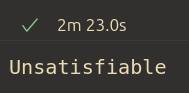

... whereas when I removed one single clause (which I did by using the *generate_clauses_minus_one()* function that simply removes the first element), the output "satisfiable" was reached in 1m46s

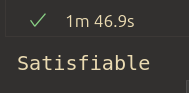

I didn't feel like testing larger sets of clauses.